# Ordinary Least Squares in Statsmodels (OLS) - Lab

## Introduction

In the previous code along, we looked all the requirements for running an ols simple regression using statsmodels. We worked with a toy example to understand the process and all the necessary steps that must be performed. In this lab , we shall look at a slightly more complex example to study the impact of spendings in different advertising channels of total sales.

## Objectives

You will be able to:
* Set up an analytical question to be answered by regression analysis
* Study regression assumptions for real world datasets
* Visualize the results of regression analysis

## Let's get started

In this lab, we will work with the "Advertising Dataset" which is a very popular dataset for studying simple regression. [The dataset is available at Kaggle](https://www.kaggle.com/purbar/advertising-data), but we have already downloaded for you. It is available as "Advertising.csv". We shall use this dataset to ask ourselves a simple analytical question:

## The Question

Which advertising channel has a strong relationship with sales volume, and can be used to model and predict the sales. 

### Step 1: Read the dataset and inspect its columns and 5-point statistics

In [1]:
# Load necessary libraries and import the data
import pandas as pd #Dataframes
import matplotlib.pyplot as plt # Godfather of plotting
import seaborn as sns # plotting right-hand man

# OLS 
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Stats and distributions
import scipy.stats as stats


In [2]:
ad = pd.read_csv('Advertising.csv')

In [3]:
# Check the columns and first few rows
ad.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
ad.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Looks like there is an extraneous 'index'-type column. I will drop it for now.

In [6]:
ad.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [7]:
ad.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
ad.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
# Get the 5-point statistics for data 
ad.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


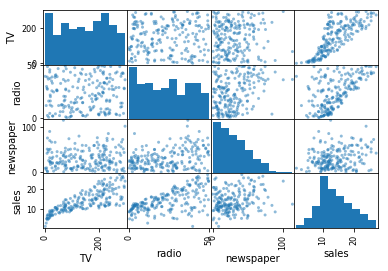

In [10]:
_ = pd.plotting.scatter_matrix(ad)


### Describe the contents of this dataset
Looks to be unit-less measurements of spend by advertising channels and sales. There appears to be a positive relationship between all three dependent variables and sales, with TV appearing to be the strongest. Though none of them appear to be particularly linear.

### Step 2: Plot histograms with kde overlay to check for the normality of the predictors

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


NameError: name 'ax' is not defined

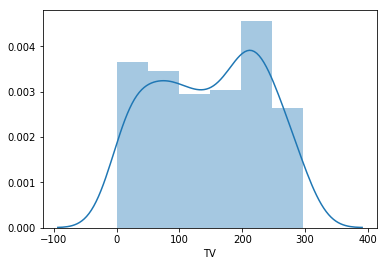

In [12]:
#fig, ax = plt.subplots(1,4)

#for i, col in enumerate(ad.drop(['sales'],axis=1).columns):
for i, col in enumerate(ad.columns):
    plt.figure(i)
    ax[i]= sns.distplot(ad[col])



In [ ]:
# For all the variables, check if they hold normality assumption


In [13]:
# Record your observations on normality here 

See scatter matrix above!

#### Remember . Nothing is perfect . So be positive 
<img src="https://4.bp.blogspot.com/-e-CL8iluz2o/Vt3Ntg_38kI/AAAAAAAAIJo/zGJMyNaMbFY/s1600/skewed.jpg" width=400>

### Step 3: Test for the linearity assumption. 
Use scatterplots to plot each predictor against the target variable

### Conclusion so far !

Based on above initial checks, we can confidently say that TV and radio appear to be good predictors for our regression analysis. Newspaper is very heavily skewed and also doesnt show any clear linear relationship with the target. 
> We shall move ahead with our analysis using TV and radio , and count out the newspaper due to the fact that data violates OLS assumptions

Note: Kurtosis can be dealt with using techniques like log normalization to "push" the peak towards the center of distribution. We shall talk about this in the next section. 

### Step 4: Run a simple regression in `statsmodels` with TV as a predictor

In [14]:
# import libraries - I'll import them again for practice
import statsmodels.api as sm
from statsmodels.formula.api import ols

# build the formula 
f = 'sales~TV'

# create a fitted model in one line
model = ols(formula=f,data=ad).fit()

### Step 5: Get regression diagnostics summary


In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 12 Apr 2019   Prob (F-statistic):           1.47e-42
Time:                        17:45:51   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Record your observations on "Goodness of fit"

- $R^2$ looks ok @ >0.6, demonstrating a decent fit.
- F-Stat is super small, indicating that it's a signficant fit.
- The p-values for `Intercept` and `TV` and basically zero, again indicating good fit.


Note here that the coefficients represent associations, not causations


### Step 6:  Draw a prediction line with data points omn a scatter plot for X (TV) and Y (Sales)

Hint: We can use `model.predict()` functions to predict the start and end point of of regression line for the minimum and maximum values in the 'TV' variable. 

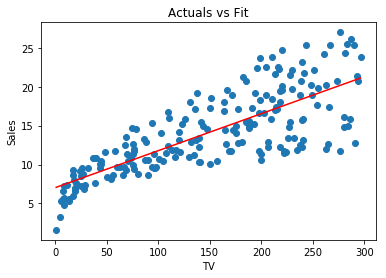

In [16]:
# create a DataFrame with the minimum and maximum values of TV
tv_smry = ad['TV'].describe().to_frame().loc[['min','max'],]

# make predictions for those x values and store them
tv_smry['sales_pred'] = model.predict(tv_smry)

# first, plot the observed data and the least squares line
fig,ax = plt.subplots()

ax.scatter( ad['TV'], ad['sales'] )
ax.set_xlabel('TV')
ax.set_ylabel('Sales')
ax.set_title('Actuals vs Fit')

ax.plot(tv_smry['TV'], tv_smry['sales_pred'], color ='red')

plt.show()

### Step 7: Visualize the error term for variance and heteroscedasticity

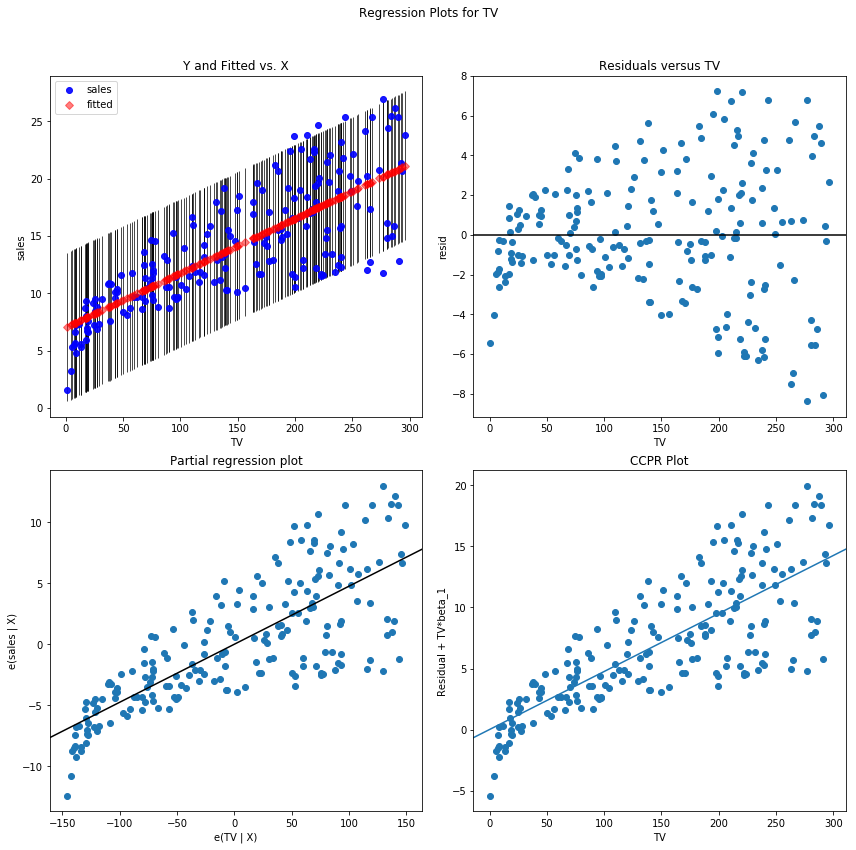

In [17]:
fig2 = plt.figure(figsize=(12,12))
fig2 = sm.graphics.plot_regress_exog(model,"TV",fig=fig2)
plt.show()

- Notice that the fitted consistently vary farther away from actuals the higher the value of TV. There is likely some uncontrolled driver.
- There's definitely some weirdness with variance. The residuals plot is definitely heteroscedastic; there is a non-random pattern to the residuals.

### Next, repeat above for radio and go through the same process, recording your observations

In [18]:
# Create formula
f2 = 'sales~radio'

# Create fitted model
model2 = ols(formula=f2,data=ad).fit()

# Inspect results
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Fri, 12 Apr 2019   Prob (F-statistic):           4.35e-19
Time:                        17:45:54   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

-$R^2$ is definitely worse that with TV. But F-statistic and p-values still seem to indicates a statically signficant fit.

Let's plot the fitted line

In [19]:
radio_smry = ad['radio'].describe().to_frame().loc[['min','max'],]

radio_smry['sales_pred'] = model2.predict(radio_smry)

radio_smry.columns = ['stat','value']

radio_smry

,stat,value
min,0.0,9.311638
max,49.6,19.355429


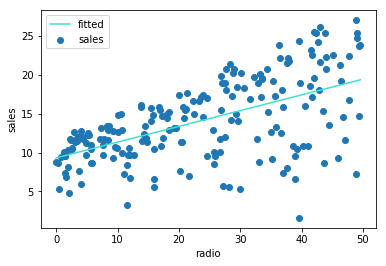

In [20]:
fig, ax = plt.subplots()

ax.scatter(ad['radio'], ad['sales'])

ax.plot(radio_smry['stat'], radio_smry['value'], color='turquoise',label='fitted')
ax.set_xlabel('radio')
ax.set_ylabel('sales')
ax.legend()
plt.show()

Not bad. But to me there is a bit of a cone shape to the data; as `radio` increases, `sales` increases as well, but the variance of sales also increase.

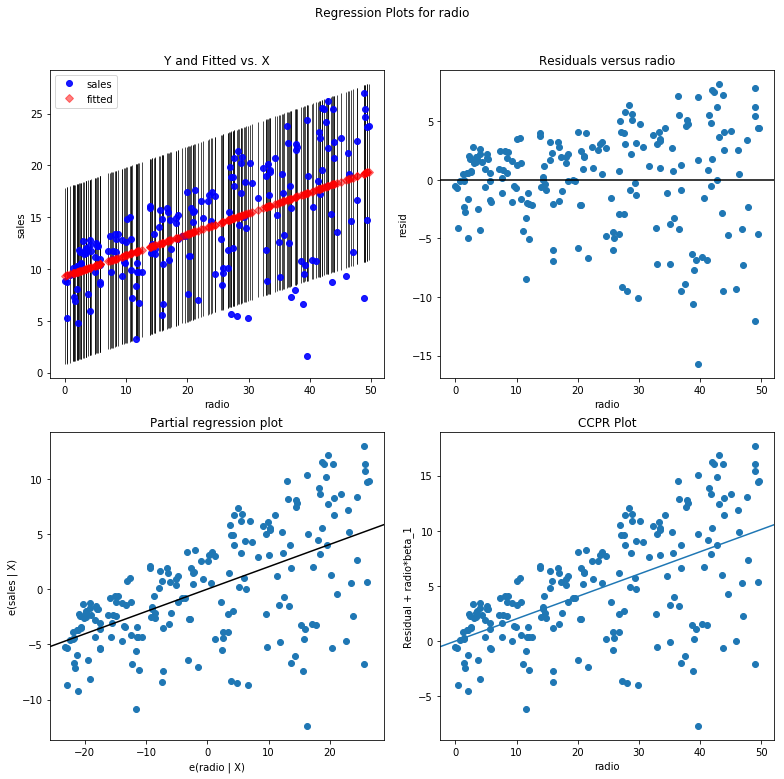

In [21]:
fig3 = plt.figure(figsize=(11,11))
fig3 = sm.graphics.plot_regress_exog(model2,'radio',fig=fig3)

Exhibits the same weaknesses as the model vs `TV`. Definitely not homoscedastic.

How about a **qqplot**?

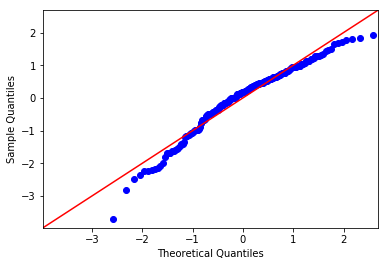

In [22]:
residuals = model2.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

Not bad, except at the edges. So, residuals are mostly normal.

# model.summary()

In [23]:
# Record your observations here for goodnes of fit 
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Fri, 12 Apr 2019   Prob (F-statistic):           4.35e-19
Time:                        17:46:00   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Oh, I already did this, look above!


## The Answer


Based on above analysis, we can conclude that none of the two chosen predictors is ideal for modeling a relationship with the sales volumes. `Newspaper` clearly violated normality and linearity assumptions. TV and radio did not provide a high value for co-efficient of determination - TV performed slightly better than the radio. There is obvious heteroscdasticity in the residuals for both variables. 

> We can either look for further data, perform extra pre-processing or use more advanced techniques. 

Remember there are lot of technqiues we can employ to FIX this data. 

Whether we should call TV the "best predictor" or label all of them "equally useless", is a domain specific question and a marketing manager would have a better opinion on how to move forward with this situation. 

In the following lesson, we shall look at the more details on interpreting the regression diagnostics and confidence in the model. 

## Summary

In this lesson, we ran a complete regression analysis with a simple dataset. We looked for the regression assumptions pre and post the analysis phase. We also created some visualizations to develop a confidence on the model and check for its goodness of fit. 